In [1]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
forest = pd.read_csv("../data/raw/forestfires.csv")

In [3]:
forest

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [4]:
forest.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [5]:
forest.dtypes

X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

### Question
How does `area` relate to other variables? Or other variables relate to each other?  

### Viz used
We found a correlation between each variable and used a heat map to visualize the correlation coefficients.

### Observation
Overall, `area` doesn't have any strong correlation with other variables as it falls between $-0.064$ to $0.079$.

Considering other variables against each other, we find that `ISI` and `FFMC` have the strongest relationship with the coefficient of $0.78$.
This makes sense since the `FFMC` index measures the moisture content in the surface litter, which usually influences ignition and fire spread whilst `ISI` is the Initial Spread Index.


<AxesSubplot:>

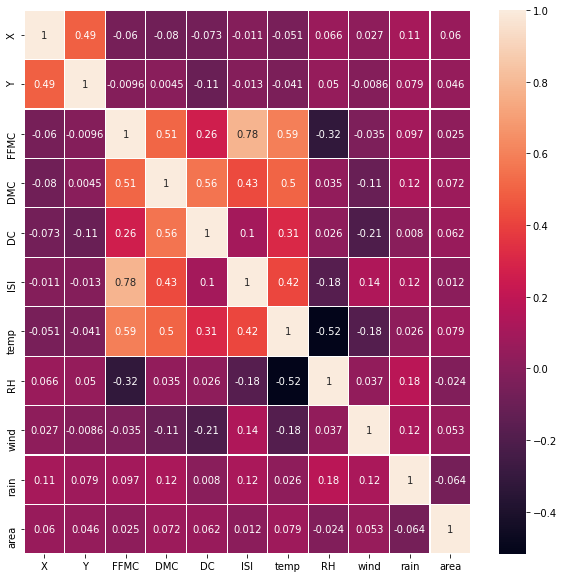

In [6]:
correlation = forest.corr(method='spearman')
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(correlation, annot= True, linewidths=.1)

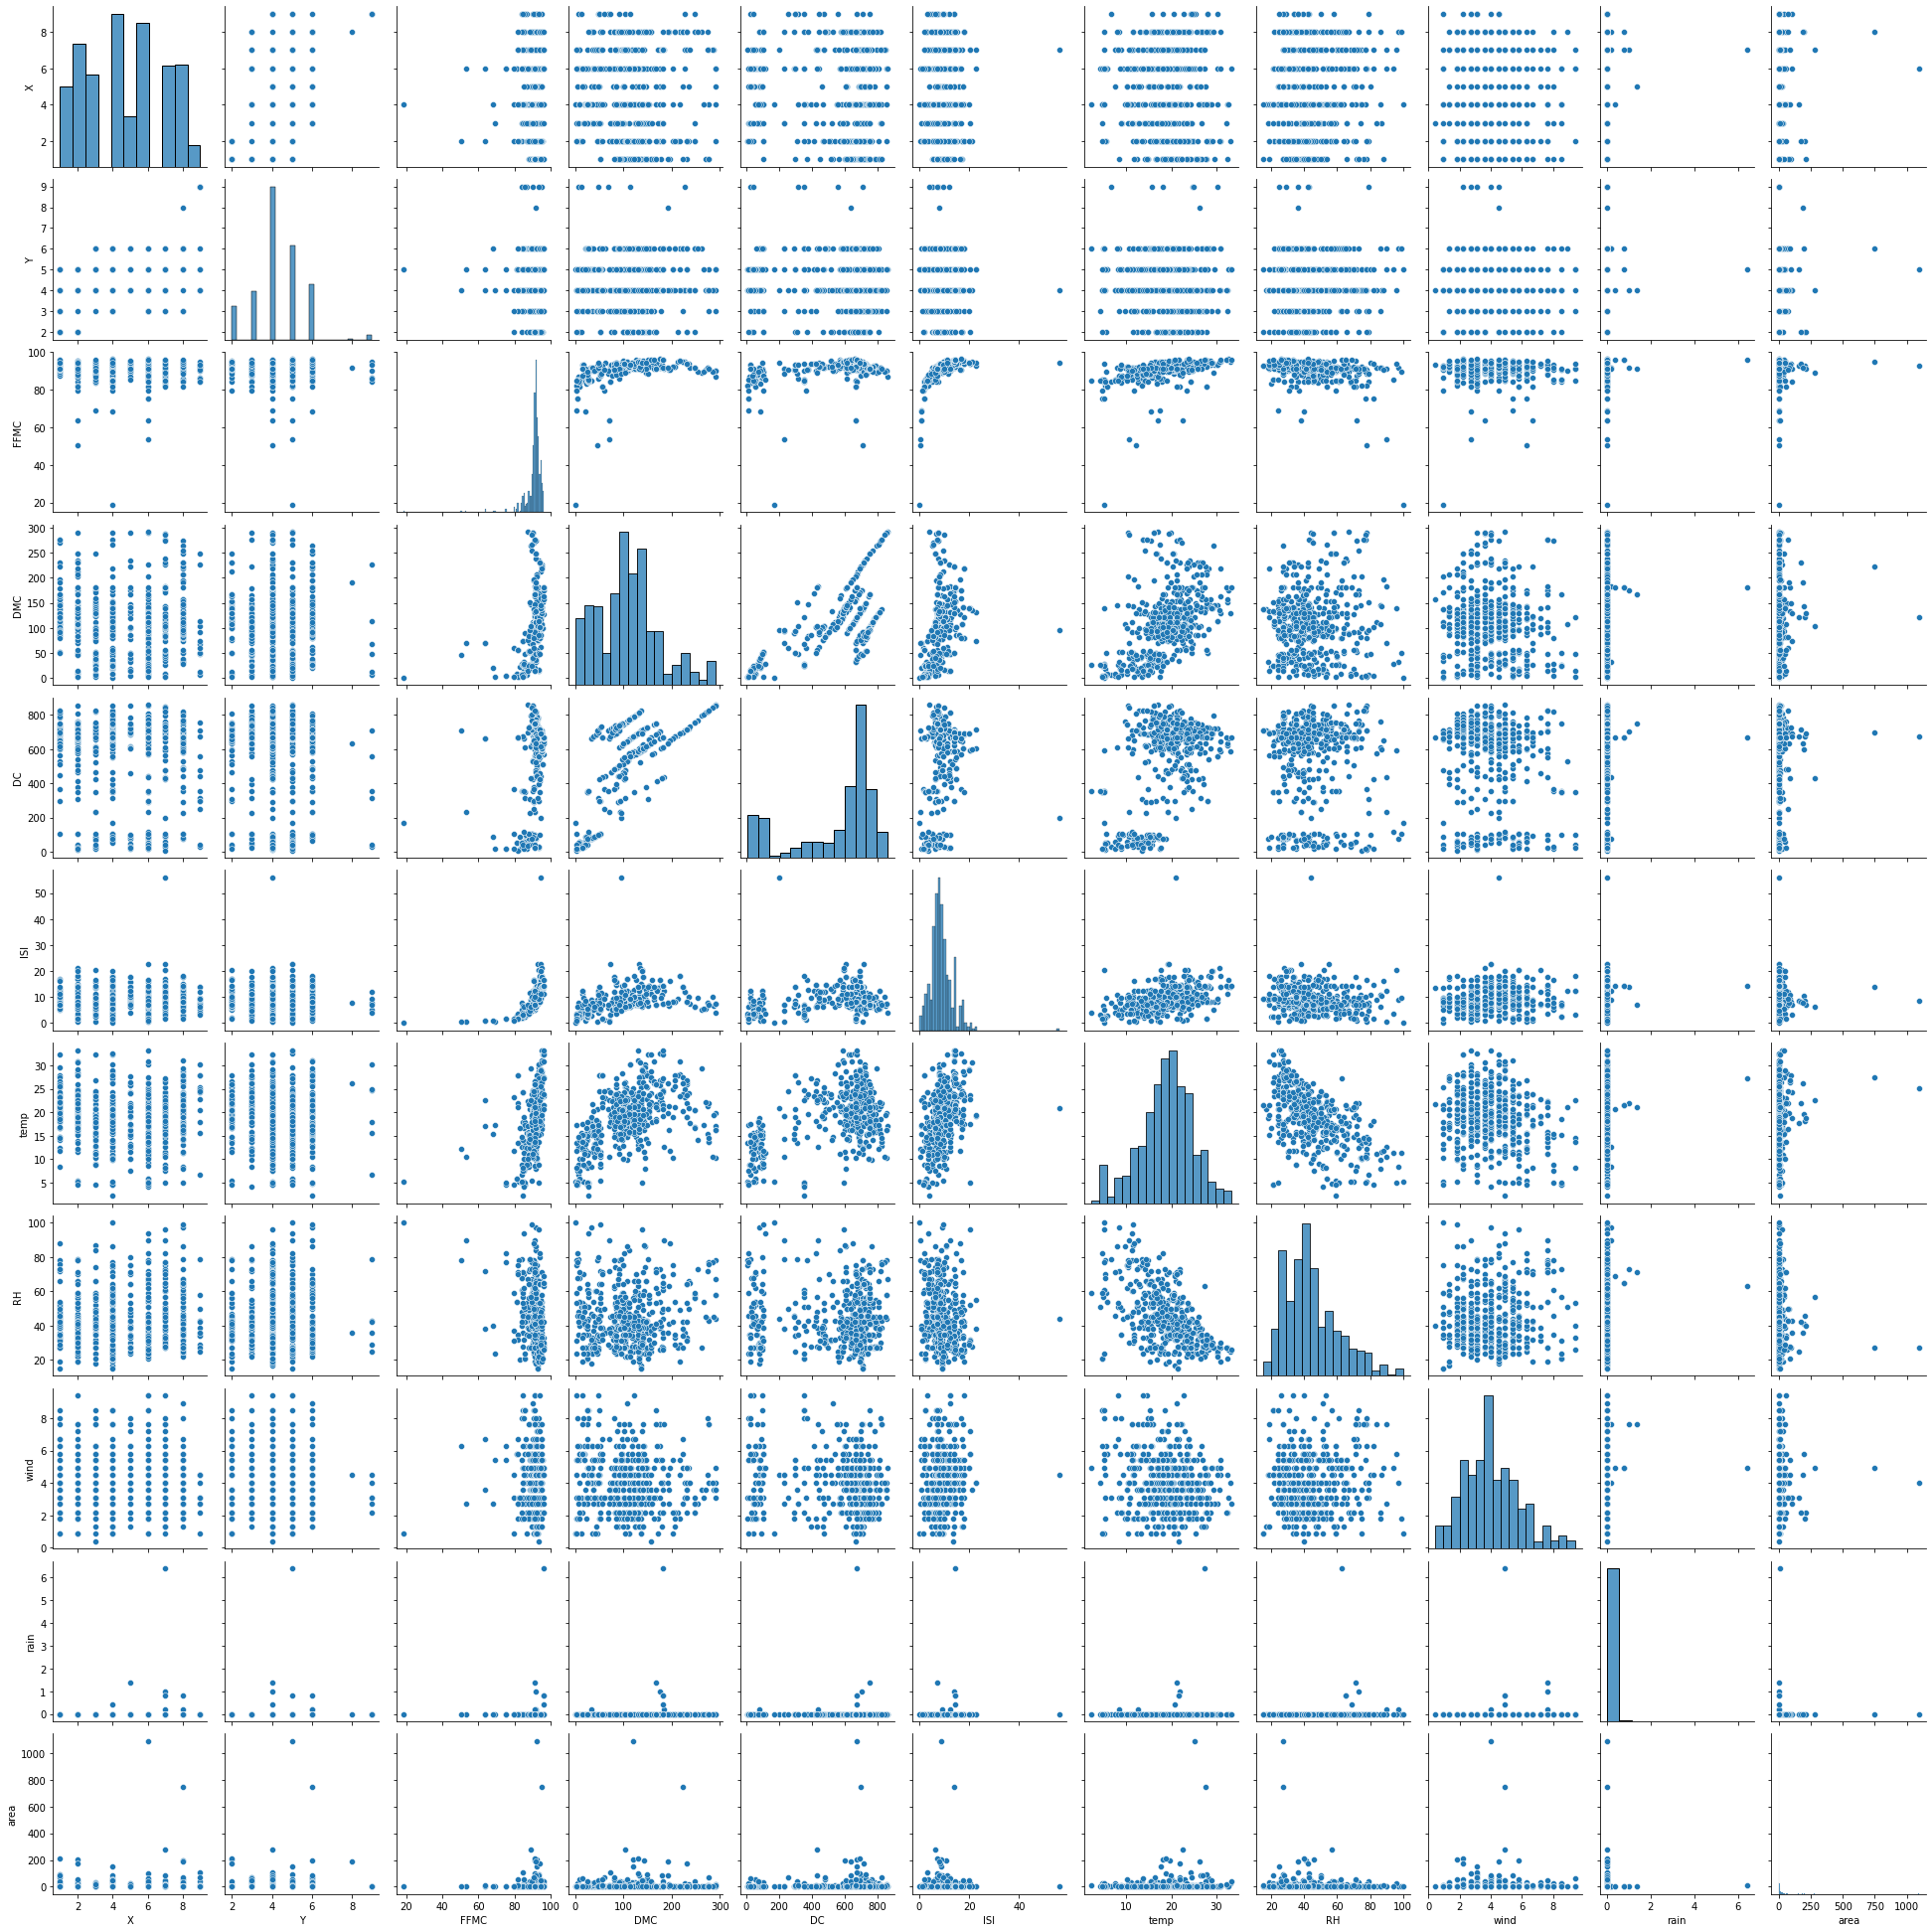

In [7]:
sns.pairplot(forest)

### Question
Are there more fires in the Summer season compared to other seasons?

### Viz used
We assigned seasons to the `month` field based on http://www.travelstart.co.za/blog/best-time-to-visit-portugal/
We then plotted the `area` to the `months` with `season` as hue.

### Observation
Inferring from the second plot, we see that on the average, summer months experience more fires.

In [8]:
month_int_season = {
    'jan' : [1, "winter"],
    'feb' : [2, "winter"],
    'mar' : [3, "spring"],
    'apr' : [4, "spring"],
    'may' : [5, "spring"],
    'jun' : [6, "summer"],
    'jul' : [7, "summer"],
    'aug' : [8, "summer"],
    'sep' : [9, "summer"],
    'oct' : [10, "fall"],
    'nov' : [11, "fall"],
    'dec' : [12, "winter"]
}

forest["month_int_season"] = forest['month'].map(month_int_season) 
forest[['month_int','season']] = pd.DataFrame(forest.month_int_season.to_list())

forest = forest.sort_values(['month_int']).reset_index(drop=True)

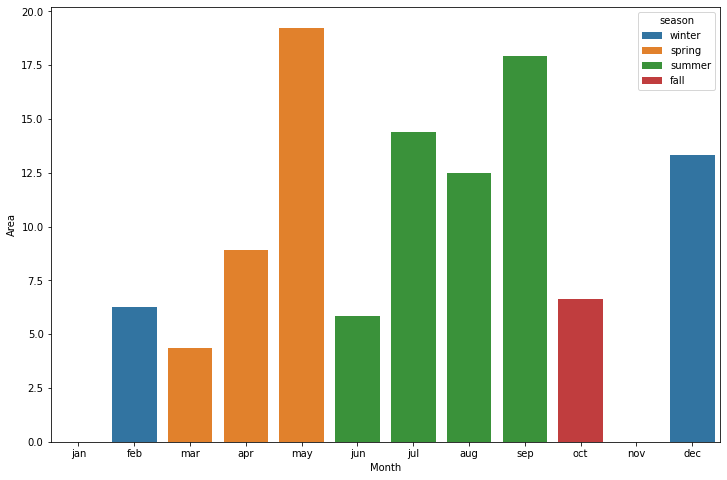

In [9]:
plt.figure(figsize=(12,8))
ax = sns. barplot(x="month", y="area", data=forest, hue="season", ci=None,  dodge=False)
ax.set(xlabel="Month", ylabel='Area')
plt.show()

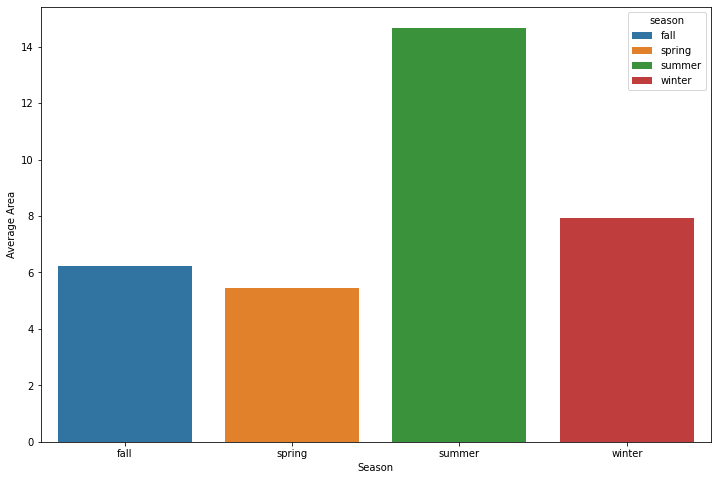

In [10]:
area_by_season = forest.groupby(["season"])[["area"]].mean()
area_by_season = area_by_season.reset_index()
plt.figure(figsize=(12,8))
ax = sns. barplot(x="season", y="area", data=area_by_season, hue="season", ci=None,  dodge=False)
ax.set(xlabel="Season", ylabel='Average Area')
plt.show()

## How's `area` distributed across days?

[Text(0.5, 0, 'Day'), Text(0, 0.5, 'Sqrt of Area')]

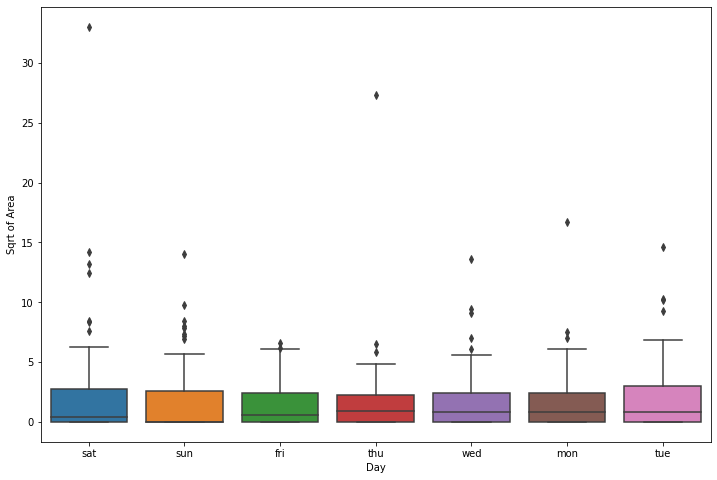

In [11]:
plt.figure(figsize=(12,8))
# sns.histplot(data=forest, x="area")

forest["sqrt_area"] = np.sqrt(forest["area"])
ax = sns.boxplot(x="day", y="sqrt_area", data=forest)
ax.set(xlabel="Day", ylabel='Sqrt of Area')

## What is the distribution of `area`?

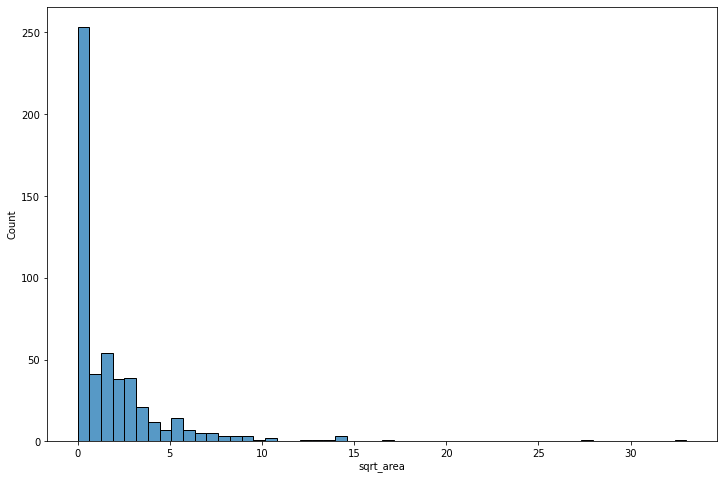

In [14]:
plt.figure(figsize=(12,8))

forest["sqrt_area"] = np.sqrt(forest["area"])
ax = sns.histplot(data=forest, x="sqrt_area")